In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import opendatasets as od

In [3]:
plt.style.use("seaborn-v0_8-deep")

In [41]:
od.download("https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction")

Skipping, found downloaded files in ".\housing-price-prediction" (use force=True to force download)


In [42]:
df= pd.read_csv("housing-price-prediction/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [44]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

C:\Users\MGC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


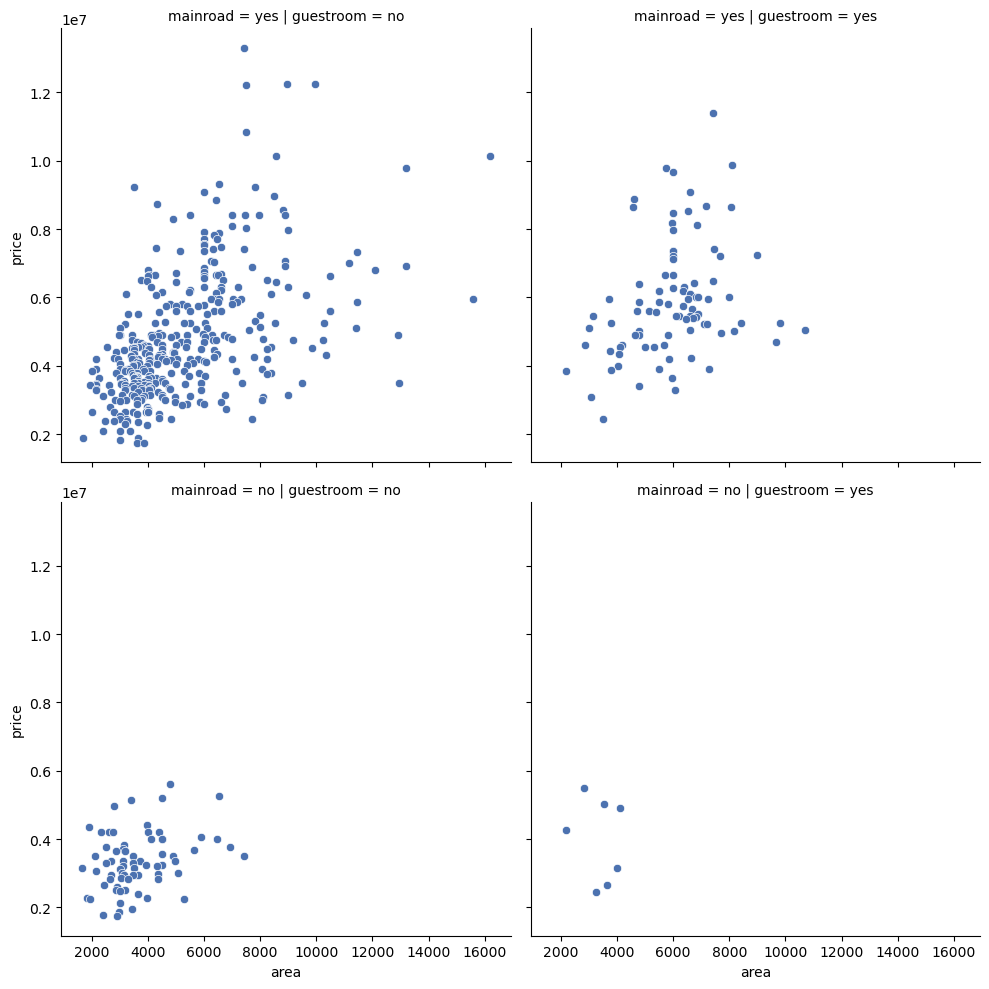

In [45]:
sns.relplot(x="area",y="price", data=df, col="guestroom", row="mainroad")

C:\Users\MGC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


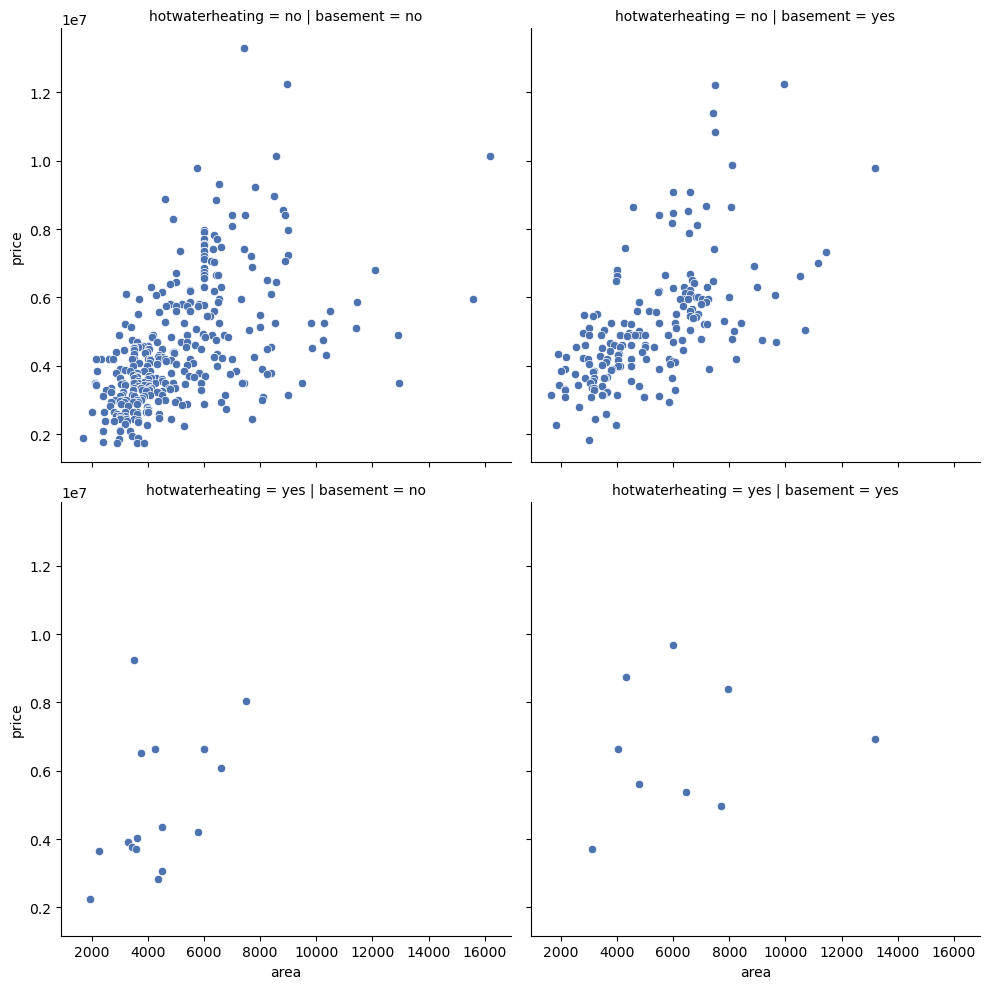

In [46]:
sns.relplot(x="area",y="price", data=df, col="basement", row="hotwaterheating")

C:\Users\MGC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


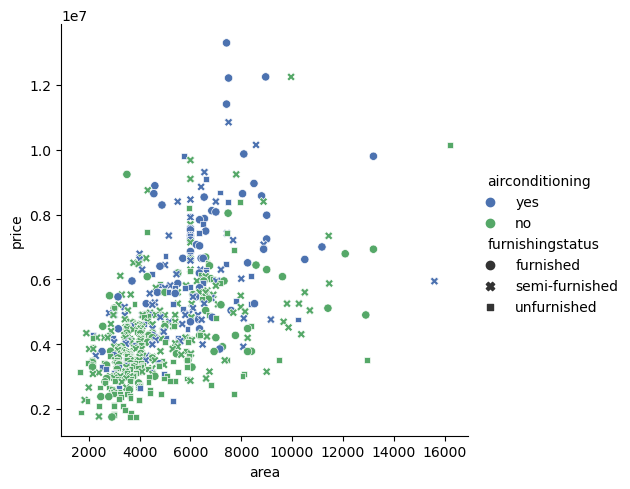

In [47]:
sns.relplot(x="area",y="price", data=df, hue="airconditioning", style="furnishingstatus")

C:\Users\MGC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


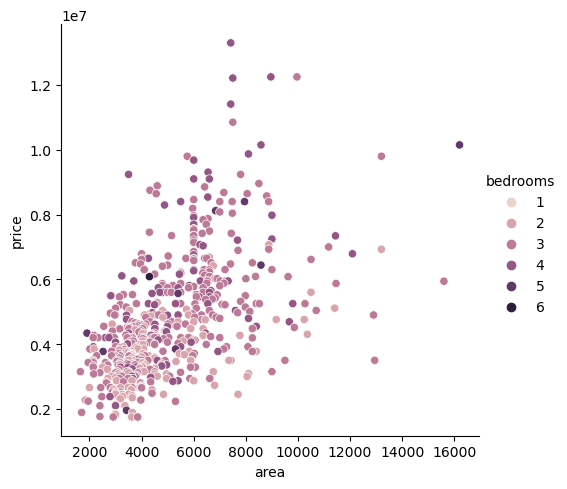

In [48]:
sns.relplot(x="area",y="price", data=df, hue="bedrooms")

In [49]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [63]:
data_dummy= pd.get_dummies(data=df, dtype=int , drop_first=True , columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning","furnishingstatus"])

In [51]:
y = df["price"]
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [69]:
x=data_dummy.drop(["price", "prefarea"], axis=1)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,0
3,7500,4,2,2,3,1,0,1,0,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [71]:
x_train 

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
513,4400,3,1,2,0,1,0,0,0,0,0,1
441,4370,3,1,2,0,1,0,0,0,0,0,1
501,2430,3,1,1,0,0,0,0,0,0,0,1
265,2880,3,1,2,0,1,0,0,0,0,1,0
109,6615,4,2,2,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
309,4632,4,1,2,0,1,0,0,0,1,1,0
512,3000,2,1,2,0,1,0,0,0,0,0,0
472,3630,4,1,2,3,1,0,0,0,0,1,0
135,6000,3,2,4,0,1,0,0,0,1,0,1


In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
model.fit(x_train , y_train)

LinearRegression()

In [77]:
model.score(x_test, y_test)

0.5593983126826164